In [4]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import matplotlib

from distutils.version import StrictVersion
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
from tensorflow.python.client import device_lib
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices())

['/device:CPU:0']


2023-01-12 14:35:36.417752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-12 14:35:36.536567: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2023-01-12 14:35:36.536618: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LeeAarthi
2023-01-12 14:35:36.536629: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LeeAarthi
2023-01-12 14:35:36.536825: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.108.3
202

In [3]:
print(os.getcwd())

/home/lee/Documents/Indian_License_Plate_Recognition


In [4]:
os.chdir(os.path.join(os.getcwd(), 'models/research'))
working_dir = os.getcwd()
print(working_dir)
sys.path.append(working_dir)
print(sys.path)
sys.path.append(working_dir + "/slim")
print(sys.path)
sys.path.append("/home/lee/Documents/Indian_License_Plate_Recognition/models/research/object_detection")
print(sys.path)

path = working_dir + ';' + working_dir + '/slim' + ';' + working_dir + '/object_detection'
os.environ['PYTHONPATH'] = path
print(os.environ['PYTHONPATH'])

os.chdir(os.path.join(os.getcwd(), 'object_detection'))
print(os.getcwd())

/home/lee/Documents/Indian_License_Plate_Recognition/models/research
['/home/lee/Documents/Indian_License_Plate_Recognition', '/home/lee/Documents/Indian_License_Plate_Recognition/models/research/slim;/home/lee/Documents/Indian_License_Plate_Recognition/models/research/object_detection', '/home/lee/anaconda3/envs/tfsetup/lib/python310.zip', '/home/lee/anaconda3/envs/tfsetup/lib/python3.10', '/home/lee/anaconda3/envs/tfsetup/lib/python3.10/lib-dynload', '', '/home/lee/.local/lib/python3.10/site-packages', '/home/lee/anaconda3/envs/tfsetup/lib/python3.10/site-packages', '/home/lee/anaconda3/envs/tfsetup/lib/python3.10/site-packages/PyQt5_sip-12.11.0-py3.10-linux-x86_64.egg', '/home/lee/Documents/Indian_License_Plate_Recognition/models/research']
['/home/lee/Documents/Indian_License_Plate_Recognition', '/home/lee/Documents/Indian_License_Plate_Recognition/models/research/slim;/home/lee/Documents/Indian_License_Plate_Recognition/models/research/object_detection', '/home/lee/anaconda3/envs/

In [5]:
import object_detection

In [9]:
MODEL = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PIPELINE_CONFING_FILENAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config'

NUM_CLASSES = 1

MODEL_FILE = MODEL + '.tar.gz'

DETECTION_COFIG_DIR = os.path.normpath('../../../config/plate_detection')
print(DETECTION_COFIG_DIR)
PATH_TO_LABELS = os.path.normpath(os.path.join(DETECTION_COFIG_DIR, 'label_map.pbtxt'))
PIPELINE_CONFING_FILEPATH = os.path.join(DETECTION_COFIG_DIR, PIPELINE_CONFING_FILENAME)
OUTPUT_DIR = os.path.normpath('../../../output/plate_detection')
print(OUTPUT_DIR)

MODELS_DIR = os.path.normpath(os.path.join(OUTPUT_DIR, 'models'))
print(MODELS_DIR)

CHECKPOINTS_DIR = '../../../output/plate_detection/checkpoint'
print(CHECKPOINTS_DIR)

PATH_TO_FROZEN_GRAPH = os.path.normpath(os.path.join(OUTPUT_DIR, 'saved_model'))
print(PATH_TO_FROZEN_GRAPH)

TFLITE_MODEL_PATH = os.path.normpath(os.path.join(OUTPUT_DIR, 'glpd-model.tflite'))
print(TFLITE_MODEL_PATH)

../../../config/plate_detection
../../../output/plate_detection
../../../output/plate_detection/models
../../../output/plate_detection/checkpoint
../../../output/plate_detection/saved_model
../../../output/plate_detection/glpd-model.tflite


In [7]:
print ('Labels file:           {}'.format(PATH_TO_LABELS))
print ('Pipeline config file:  {}'.format(PIPELINE_CONFING_FILEPATH))
print ('Checkpoints directory: {}'.format(CHECKPOINTS_DIR))
print ('Frozen model file:     {}'.format(PATH_TO_FROZEN_GRAPH))
print ('TFLite model file:     {}'.format(TFLITE_MODEL_PATH))

Labels file:           ../../../config/plate_detection/label_map.pbtxt
Pipeline config file:  ../../../config/plate_detection/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config
Checkpoints directory: ../../../output/plate_detection/checkpoint
Frozen model file:     ../../../output/plate_detection/saved_model
TFLite model file:     ../../../output/plate_detection/glpd-model.tflite


In [11]:
print(os.getcwd())
os.chdir('/home/lee/Documents/Indian_License_Plate_Recognition/models/research/object_detection')
print(os.getcwd())

/home/lee/Documents/Indian_License_Plate_Recognition
/home/lee/Documents/Indian_License_Plate_Recognition/models/research/object_detection


In [38]:
!python model_main_tf2.py --pipeline_config_path={PIPELINE_CONFING_FILEPATH} --model_dir={CHECKPOINTS_DIR} --sample_1_of_n_eval_examples=40 --checkpoint_every_n=100 --alsologtostderr

2023-01-13 04:48:29.702141: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-13 04:48:29.793311: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-13 04:48:30.345529: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-13 04:48:30.345571: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
W0113 04:48:38.619865 140383764731712 deprecation.py:350] From /home/lee/.local/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1176: sample_distorted_bounding_box (from tensorflow.python.ops.image_ops_impl) is deprecated and will be removed in a future version.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use `tf.cast` instead.
W0113 04:48:39.613369 140383764731712 deprecation.py:350] From /home/lee/.local/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1176: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
2023-01-13 04:48:41.061883: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement t

INFO:tensorflow:Step 1200 per-step time 1.266s
I0113 05:14:44.428755 140383764731712 model_lib_v2.py:705] Step 1200 per-step time 1.266s
INFO:tensorflow:{'Loss/classification_loss': 0.097875774,
 'Loss/localization_loss': 0.062480424,
 'Loss/regularization_loss': 0.15003313,
 'Loss/total_loss': 0.31038934,
 'learning_rate': 0.079996705}
I0113 05:14:44.428948 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.097875774,
 'Loss/localization_loss': 0.062480424,
 'Loss/regularization_loss': 0.15003313,
 'Loss/total_loss': 0.31038934,
 'learning_rate': 0.079996705}
INFO:tensorflow:Step 1300 per-step time 1.267s
I0113 05:16:51.160077 140383764731712 model_lib_v2.py:705] Step 1300 per-step time 1.267s
INFO:tensorflow:{'Loss/classification_loss': 0.11205003,
 'Loss/localization_loss': 0.05043669,
 'Loss/regularization_loss': 0.1495708,
 'Loss/total_loss': 0.3120575,
 'learning_rate': 0.0799926}
I0113 05:16:51.160274 140383764731712 model_lib_v2.py:708] {'Loss/classification_lo

INFO:tensorflow:Step 2700 per-step time 1.264s
I0113 05:46:23.169800 140383764731712 model_lib_v2.py:705] Step 2700 per-step time 1.264s
INFO:tensorflow:{'Loss/classification_loss': 0.09713731,
 'Loss/localization_loss': 0.016266001,
 'Loss/regularization_loss': 0.1410034,
 'Loss/total_loss': 0.2544067,
 'learning_rate': 0.07976264}
I0113 05:46:23.169987 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.09713731,
 'Loss/localization_loss': 0.016266001,
 'Loss/regularization_loss': 0.1410034,
 'Loss/total_loss': 0.2544067,
 'learning_rate': 0.07976264}
INFO:tensorflow:Step 2800 per-step time 1.266s
I0113 05:48:29.758767 140383764731712 model_lib_v2.py:705] Step 2800 per-step time 1.266s
INFO:tensorflow:{'Loss/classification_loss': 0.11290128,
 'Loss/localization_loss': 0.07347096,
 'Loss/regularization_loss': 0.1403322,
 'Loss/total_loss': 0.32670444,
 'learning_rate': 0.07973392}
I0113 05:48:29.758952 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0

INFO:tensorflow:Step 4200 per-step time 1.267s
I0113 06:18:07.479995 140383764731712 model_lib_v2.py:705] Step 4200 per-step time 1.267s
INFO:tensorflow:{'Loss/classification_loss': 0.05615536,
 'Loss/localization_loss': 0.025997592,
 'Loss/regularization_loss': 0.1316728,
 'Loss/total_loss': 0.21382575,
 'learning_rate': 0.07916109}
I0113 06:18:07.480189 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.05615536,
 'Loss/localization_loss': 0.025997592,
 'Loss/regularization_loss': 0.1316728,
 'Loss/total_loss': 0.21382575,
 'learning_rate': 0.07916109}
INFO:tensorflow:Step 4300 per-step time 1.263s
I0113 06:20:13.823609 140383764731712 model_lib_v2.py:705] Step 4300 per-step time 1.263s
INFO:tensorflow:{'Loss/classification_loss': 0.115487844,
 'Loss/localization_loss': 0.04568539,
 'Loss/regularization_loss': 0.1311255,
 'Loss/total_loss': 0.29229873,
 'learning_rate': 0.07910804}
I0113 06:20:13.823809 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss'

INFO:tensorflow:Step 5700 per-step time 1.271s
I0113 06:49:47.229574 140383764731712 model_lib_v2.py:705] Step 5700 per-step time 1.271s
INFO:tensorflow:{'Loss/classification_loss': 0.066617265,
 'Loss/localization_loss': 0.030876676,
 'Loss/regularization_loss': 0.12285189,
 'Loss/total_loss': 0.22034584,
 'learning_rate': 0.07819763}
I0113 06:49:47.229779 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.066617265,
 'Loss/localization_loss': 0.030876676,
 'Loss/regularization_loss': 0.12285189,
 'Loss/total_loss': 0.22034584,
 'learning_rate': 0.07819763}
INFO:tensorflow:Step 5800 per-step time 1.292s
I0113 06:51:56.393377 140383764731712 model_lib_v2.py:705] Step 5800 per-step time 1.292s
INFO:tensorflow:{'Loss/classification_loss': 0.08129495,
 'Loss/localization_loss': 0.047313947,
 'Loss/regularization_loss': 0.12227447,
 'Loss/total_loss': 0.25088337,
 'learning_rate': 0.07812072}
I0113 06:51:56.393558 140383764731712 model_lib_v2.py:708] {'Loss/classification_

INFO:tensorflow:Step 7200 per-step time 1.288s
I0113 07:21:39.796860 140383764731712 model_lib_v2.py:705] Step 7200 per-step time 1.288s
INFO:tensorflow:{'Loss/classification_loss': 0.06991774,
 'Loss/localization_loss': 0.017826507,
 'Loss/regularization_loss': 0.1146023,
 'Loss/total_loss': 0.20234655,
 'learning_rate': 0.07688115}
I0113 07:21:39.797039 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.06991774,
 'Loss/localization_loss': 0.017826507,
 'Loss/regularization_loss': 0.1146023,
 'Loss/total_loss': 0.20234655,
 'learning_rate': 0.07688115}
INFO:tensorflow:Step 7300 per-step time 1.294s
I0113 07:23:49.237407 140383764731712 model_lib_v2.py:705] Step 7300 per-step time 1.294s
INFO:tensorflow:{'Loss/classification_loss': 0.059852276,
 'Loss/localization_loss': 0.020196397,
 'Loss/regularization_loss': 0.11406618,
 'Loss/total_loss': 0.19411485,
 'learning_rate': 0.07678111}
I0113 07:23:49.237603 140383764731712 model_lib_v2.py:708] {'Loss/classification_los

INFO:tensorflow:Step 8700 per-step time 1.271s
I0113 07:53:35.693877 140383764731712 model_lib_v2.py:705] Step 8700 per-step time 1.271s
INFO:tensorflow:{'Loss/classification_loss': 0.055328578,
 'Loss/localization_loss': 0.016567921,
 'Loss/regularization_loss': 0.10712555,
 'Loss/total_loss': 0.17902204,
 'learning_rate': 0.07522382}
I0113 07:53:35.694070 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.055328578,
 'Loss/localization_loss': 0.016567921,
 'Loss/regularization_loss': 0.10712555,
 'Loss/total_loss': 0.17902204,
 'learning_rate': 0.07522382}
INFO:tensorflow:Step 8800 per-step time 1.264s
I0113 07:55:42.121290 140383764731712 model_lib_v2.py:705] Step 8800 per-step time 1.264s
INFO:tensorflow:{'Loss/classification_loss': 0.048736066,
 'Loss/localization_loss': 0.015691387,
 'Loss/regularization_loss': 0.10664833,
 'Loss/total_loss': 0.17107578,
 'learning_rate': 0.07510157}
I0113 07:55:42.121497 140383764731712 model_lib_v2.py:708] {'Loss/classification

INFO:tensorflow:Step 10200 per-step time 1.267s
I0113 08:25:24.093635 140383764731712 model_lib_v2.py:705] Step 10200 per-step time 1.267s
INFO:tensorflow:{'Loss/classification_loss': 0.061460715,
 'Loss/localization_loss': 0.014291079,
 'Loss/regularization_loss': 0.10022762,
 'Loss/total_loss': 0.1759794,
 'learning_rate': 0.073240966}
I0113 08:25:24.093832 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.061460715,
 'Loss/localization_loss': 0.014291079,
 'Loss/regularization_loss': 0.10022762,
 'Loss/total_loss': 0.1759794,
 'learning_rate': 0.073240966}
INFO:tensorflow:Step 10300 per-step time 1.269s
I0113 08:27:30.986431 140383764731712 model_lib_v2.py:705] Step 10300 per-step time 1.269s
INFO:tensorflow:{'Loss/classification_loss': 0.062415417,
 'Loss/localization_loss': 0.01770063,
 'Loss/regularization_loss': 0.0997887,
 'Loss/total_loss': 0.17990474,
 'learning_rate': 0.07309763}
I0113 08:27:30.986631 140383764731712 model_lib_v2.py:708] {'Loss/classificati

INFO:tensorflow:Step 11700 per-step time 1.265s
I0113 08:57:18.033818 140383764731712 model_lib_v2.py:705] Step 11700 per-step time 1.265s
INFO:tensorflow:{'Loss/classification_loss': 0.057934217,
 'Loss/localization_loss': 0.020208145,
 'Loss/regularization_loss': 0.094087094,
 'Loss/total_loss': 0.17222947,
 'learning_rate': 0.070950896}
I0113 08:57:18.034032 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.057934217,
 'Loss/localization_loss': 0.020208145,
 'Loss/regularization_loss': 0.094087094,
 'Loss/total_loss': 0.17222947,
 'learning_rate': 0.070950896}
INFO:tensorflow:Step 11800 per-step time 1.267s
I0113 08:59:24.737712 140383764731712 model_lib_v2.py:705] Step 11800 per-step time 1.267s
INFO:tensorflow:{'Loss/classification_loss': 0.052401833,
 'Loss/localization_loss': 0.016354758,
 'Loss/regularization_loss': 0.09369855,
 'Loss/total_loss': 0.16245513,
 'learning_rate': 0.07078781}
I0113 08:59:24.737903 140383764731712 model_lib_v2.py:708] {'Loss/classi

INFO:tensorflow:Step 13200 per-step time 1.280s
I0113 09:29:01.363972 140383764731712 model_lib_v2.py:705] Step 13200 per-step time 1.280s
INFO:tensorflow:{'Loss/classification_loss': 0.063044086,
 'Loss/localization_loss': 0.011302507,
 'Loss/regularization_loss': 0.08845839,
 'Loss/total_loss': 0.16280498,
 'learning_rate': 0.0683748}
I0113 09:29:01.364161 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.063044086,
 'Loss/localization_loss': 0.011302507,
 'Loss/regularization_loss': 0.08845839,
 'Loss/total_loss': 0.16280498,
 'learning_rate': 0.0683748}
INFO:tensorflow:Step 13300 per-step time 1.279s
I0113 09:31:09.299855 140383764731712 model_lib_v2.py:705] Step 13300 per-step time 1.279s
INFO:tensorflow:{'Loss/classification_loss': 0.07539106,
 'Loss/localization_loss': 0.02664324,
 'Loss/regularization_loss': 0.08810721,
 'Loss/total_loss': 0.19014153,
 'learning_rate': 0.06819345}
I0113 09:31:09.300061 140383764731712 model_lib_v2.py:708] {'Loss/classification

INFO:tensorflow:Step 14700 per-step time 1.267s
I0113 10:00:43.707804 140383764731712 model_lib_v2.py:705] Step 14700 per-step time 1.267s
INFO:tensorflow:{'Loss/classification_loss': 0.08524696,
 'Loss/localization_loss': 0.016840745,
 'Loss/regularization_loss': 0.083418004,
 'Loss/total_loss': 0.1855057,
 'learning_rate': 0.06553646}
I0113 10:00:43.707996 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.08524696,
 'Loss/localization_loss': 0.016840745,
 'Loss/regularization_loss': 0.083418004,
 'Loss/total_loss': 0.1855057,
 'learning_rate': 0.06553646}
INFO:tensorflow:Step 14800 per-step time 1.269s
I0113 10:02:50.656432 140383764731712 model_lib_v2.py:705] Step 14800 per-step time 1.269s
INFO:tensorflow:{'Loss/classification_loss': 0.057369415,
 'Loss/localization_loss': 0.03621956,
 'Loss/regularization_loss': 0.08310436,
 'Loss/total_loss': 0.17669332,
 'learning_rate': 0.065338545}
I0113 10:02:50.656626 140383764731712 model_lib_v2.py:708] {'Loss/classificati

INFO:tensorflow:Step 16200 per-step time 1.269s
I0113 10:32:28.544018 140383764731712 model_lib_v2.py:705] Step 16200 per-step time 1.269s
INFO:tensorflow:{'Loss/classification_loss': 0.05513842,
 'Loss/localization_loss': 0.008913035,
 'Loss/regularization_loss': 0.07886737,
 'Loss/total_loss': 0.14291883,
 'learning_rate': 0.062462118}
I0113 10:32:28.544215 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.05513842,
 'Loss/localization_loss': 0.008913035,
 'Loss/regularization_loss': 0.07886737,
 'Loss/total_loss': 0.14291883,
 'learning_rate': 0.062462118}
INFO:tensorflow:Step 16300 per-step time 1.263s
I0113 10:34:34.825421 140383764731712 model_lib_v2.py:705] Step 16300 per-step time 1.263s
INFO:tensorflow:{'Loss/classification_loss': 0.063387744,
 'Loss/localization_loss': 0.030579591,
 'Loss/regularization_loss': 0.07857906,
 'Loss/total_loss': 0.1725464,
 'learning_rate': 0.06224946}
I0113 10:34:34.825613 140383764731712 model_lib_v2.py:708] {'Loss/classificat

INFO:tensorflow:Step 17700 per-step time 1.267s
I0113 11:04:01.895956 140383764731712 model_lib_v2.py:705] Step 17700 per-step time 1.267s
INFO:tensorflow:{'Loss/classification_loss': 0.04467396,
 'Loss/localization_loss': 0.021551529,
 'Loss/regularization_loss': 0.07498077,
 'Loss/total_loss': 0.14120626,
 'learning_rate': 0.059180185}
I0113 11:04:01.896142 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.04467396,
 'Loss/localization_loss': 0.021551529,
 'Loss/regularization_loss': 0.07498077,
 'Loss/total_loss': 0.14120626,
 'learning_rate': 0.059180185}
INFO:tensorflow:Step 17800 per-step time 1.264s
I0113 11:06:08.304354 140383764731712 model_lib_v2.py:705] Step 17800 per-step time 1.264s
INFO:tensorflow:{'Loss/classification_loss': 0.06303456,
 'Loss/localization_loss': 0.021191366,
 'Loss/regularization_loss': 0.07472478,
 'Loss/total_loss': 0.15895069,
 'learning_rate': 0.05895474}
I0113 11:06:08.304552 140383764731712 model_lib_v2.py:708] {'Loss/classificat

INFO:tensorflow:Step 19200 per-step time 1.264s
I0113 11:35:39.121528 140383764731712 model_lib_v2.py:705] Step 19200 per-step time 1.264s
INFO:tensorflow:{'Loss/classification_loss': 0.07883811,
 'Loss/localization_loss': 0.012158361,
 'Loss/regularization_loss': 0.07131188,
 'Loss/total_loss': 0.16230837,
 'learning_rate': 0.055721}
I0113 11:35:39.121793 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.07883811,
 'Loss/localization_loss': 0.012158361,
 'Loss/regularization_loss': 0.07131188,
 'Loss/total_loss': 0.16230837,
 'learning_rate': 0.055721}
INFO:tensorflow:Step 19300 per-step time 1.262s
I0113 11:37:45.301489 140383764731712 model_lib_v2.py:705] Step 19300 per-step time 1.262s
INFO:tensorflow:{'Loss/classification_loss': 0.07167279,
 'Loss/localization_loss': 0.019574111,
 'Loss/regularization_loss': 0.07107915,
 'Loss/total_loss': 0.16232604,
 'learning_rate': 0.055484857}
I0113 11:37:45.301669 140383764731712 model_lib_v2.py:708] {'Loss/classification_l

INFO:tensorflow:Step 20700 per-step time 1.284s
I0113 12:07:18.593896 140383764731712 model_lib_v2.py:705] Step 20700 per-step time 1.284s
INFO:tensorflow:{'Loss/classification_loss': 0.0572362,
 'Loss/localization_loss': 0.011507928,
 'Loss/regularization_loss': 0.068011105,
 'Loss/total_loss': 0.13675523,
 'learning_rate': 0.052116517}
I0113 12:07:18.594092 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.0572362,
 'Loss/localization_loss': 0.011507928,
 'Loss/regularization_loss': 0.068011105,
 'Loss/total_loss': 0.13675523,
 'learning_rate': 0.052116517}
INFO:tensorflow:Step 20800 per-step time 1.271s
I0113 12:09:25.656078 140383764731712 model_lib_v2.py:705] Step 20800 per-step time 1.271s
INFO:tensorflow:{'Loss/classification_loss': 0.06578539,
 'Loss/localization_loss': 0.022420367,
 'Loss/regularization_loss': 0.067797095,
 'Loss/total_loss': 0.15600285,
 'learning_rate': 0.05187187}
I0113 12:09:25.656272 140383764731712 model_lib_v2.py:708] {'Loss/classifica

INFO:tensorflow:Step 22200 per-step time 1.268s
I0113 12:39:04.567797 140383764731712 model_lib_v2.py:705] Step 22200 per-step time 1.268s
INFO:tensorflow:{'Loss/classification_loss': 0.037240732,
 'Loss/localization_loss': 0.009678542,
 'Loss/regularization_loss': 0.065053925,
 'Loss/total_loss': 0.111973196,
 'learning_rate': 0.048400067}
I0113 12:39:04.568003 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.037240732,
 'Loss/localization_loss': 0.009678542,
 'Loss/regularization_loss': 0.065053925,
 'Loss/total_loss': 0.111973196,
 'learning_rate': 0.048400067}
INFO:tensorflow:Step 22300 per-step time 1.274s
I0113 12:41:11.968976 140383764731712 model_lib_v2.py:705] Step 22300 per-step time 1.274s
INFO:tensorflow:{'Loss/classification_loss': 0.053741008,
 'Loss/localization_loss': 0.010091173,
 'Loss/regularization_loss': 0.06486951,
 'Loss/total_loss': 0.12870169,
 'learning_rate': 0.048149157}
I0113 12:41:11.969166 140383764731712 model_lib_v2.py:708] {'Loss/cla

INFO:tensorflow:Step 23700 per-step time 1.263s
I0113 13:11:08.683203 140383764731712 model_lib_v2.py:705] Step 23700 per-step time 1.263s
INFO:tensorflow:{'Loss/classification_loss': 0.034593266,
 'Loss/localization_loss': 0.009905741,
 'Loss/regularization_loss': 0.062411103,
 'Loss/total_loss': 0.10691011,
 'learning_rate': 0.044605974}
I0113 13:11:08.683399 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.034593266,
 'Loss/localization_loss': 0.009905741,
 'Loss/regularization_loss': 0.062411103,
 'Loss/total_loss': 0.10691011,
 'learning_rate': 0.044605974}
INFO:tensorflow:Step 23800 per-step time 1.291s
I0113 13:13:17.809735 140383764731712 model_lib_v2.py:705] Step 23800 per-step time 1.291s
INFO:tensorflow:{'Loss/classification_loss': 0.053291824,
 'Loss/localization_loss': 0.010848036,
 'Loss/regularization_loss': 0.0622468,
 'Loss/total_loss': 0.12638666,
 'learning_rate': 0.044351134}
I0113 13:13:17.809925 140383764731712 model_lib_v2.py:708] {'Loss/classi

INFO:tensorflow:Step 25200 per-step time 1.371s
I0113 13:43:45.448287 140383764731712 model_lib_v2.py:705] Step 25200 per-step time 1.371s
INFO:tensorflow:{'Loss/classification_loss': 0.047661383,
 'Loss/localization_loss': 0.014508803,
 'Loss/regularization_loss': 0.060056522,
 'Loss/total_loss': 0.12222671,
 'learning_rate': 0.04076932}
I0113 13:43:45.448483 140383764731712 model_lib_v2.py:708] {'Loss/classification_loss': 0.047661383,
 'Loss/localization_loss': 0.014508803,
 'Loss/regularization_loss': 0.060056522,
 'Loss/total_loss': 0.12222671,
 'learning_rate': 0.04076932}
INFO:tensorflow:Step 25300 per-step time 1.357s
I0113 13:46:01.188396 140383764731712 model_lib_v2.py:705] Step 25300 per-step time 1.357s
INFO:tensorflow:{'Loss/classification_loss': 0.022140028,
 'Loss/localization_loss': 0.0069971704,
 'Loss/regularization_loss': 0.0599114,
 'Loss/total_loss': 0.089048594,
 'learning_rate': 0.0405129}
I0113 13:46:01.188588 140383764731712 model_lib_v2.py:708] {'Loss/classifi

In [67]:
!python exporter_main_v2.py --trained_checkpoint_dir={CHECKPOINTS_DIR} --pipeline_config_path={PIPELINE_CONFING_FILEPATH} --output_directory=/home/lee/Documents/Indian_License_Plate_Recognition/output/plate_detection/fullModel

2023-01-13 14:46:10.515149: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-13 14:46:10.616167: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-13 14:46:11.311705: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-13 14:46:11.311752: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

W0113 14:46:32.277888 139974802519872 save.py:271] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalClassHead_layer_call_fn while saving (showing 5 of 173). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /home/lee/Documents/Indian_License_Plate_Recognition/output/plate_detection/fullModel/saved_model/assets
I0113 14:46:35.184011 139974802519872 builder_impl.py:797] Assets written to: /home/lee/Documents/Indian_License_Plate_Recognition/output/plate_detection/fullModel/saved_model/assets
INFO:tensorflow:Writing pipeline config file to /home/lee/Documents/Indian_License_Plate_Recognition/output/plate_detection/fullModel/pipeline.config
I0113 14:46:36.044083 139974802519872 config

Loading model...Done!


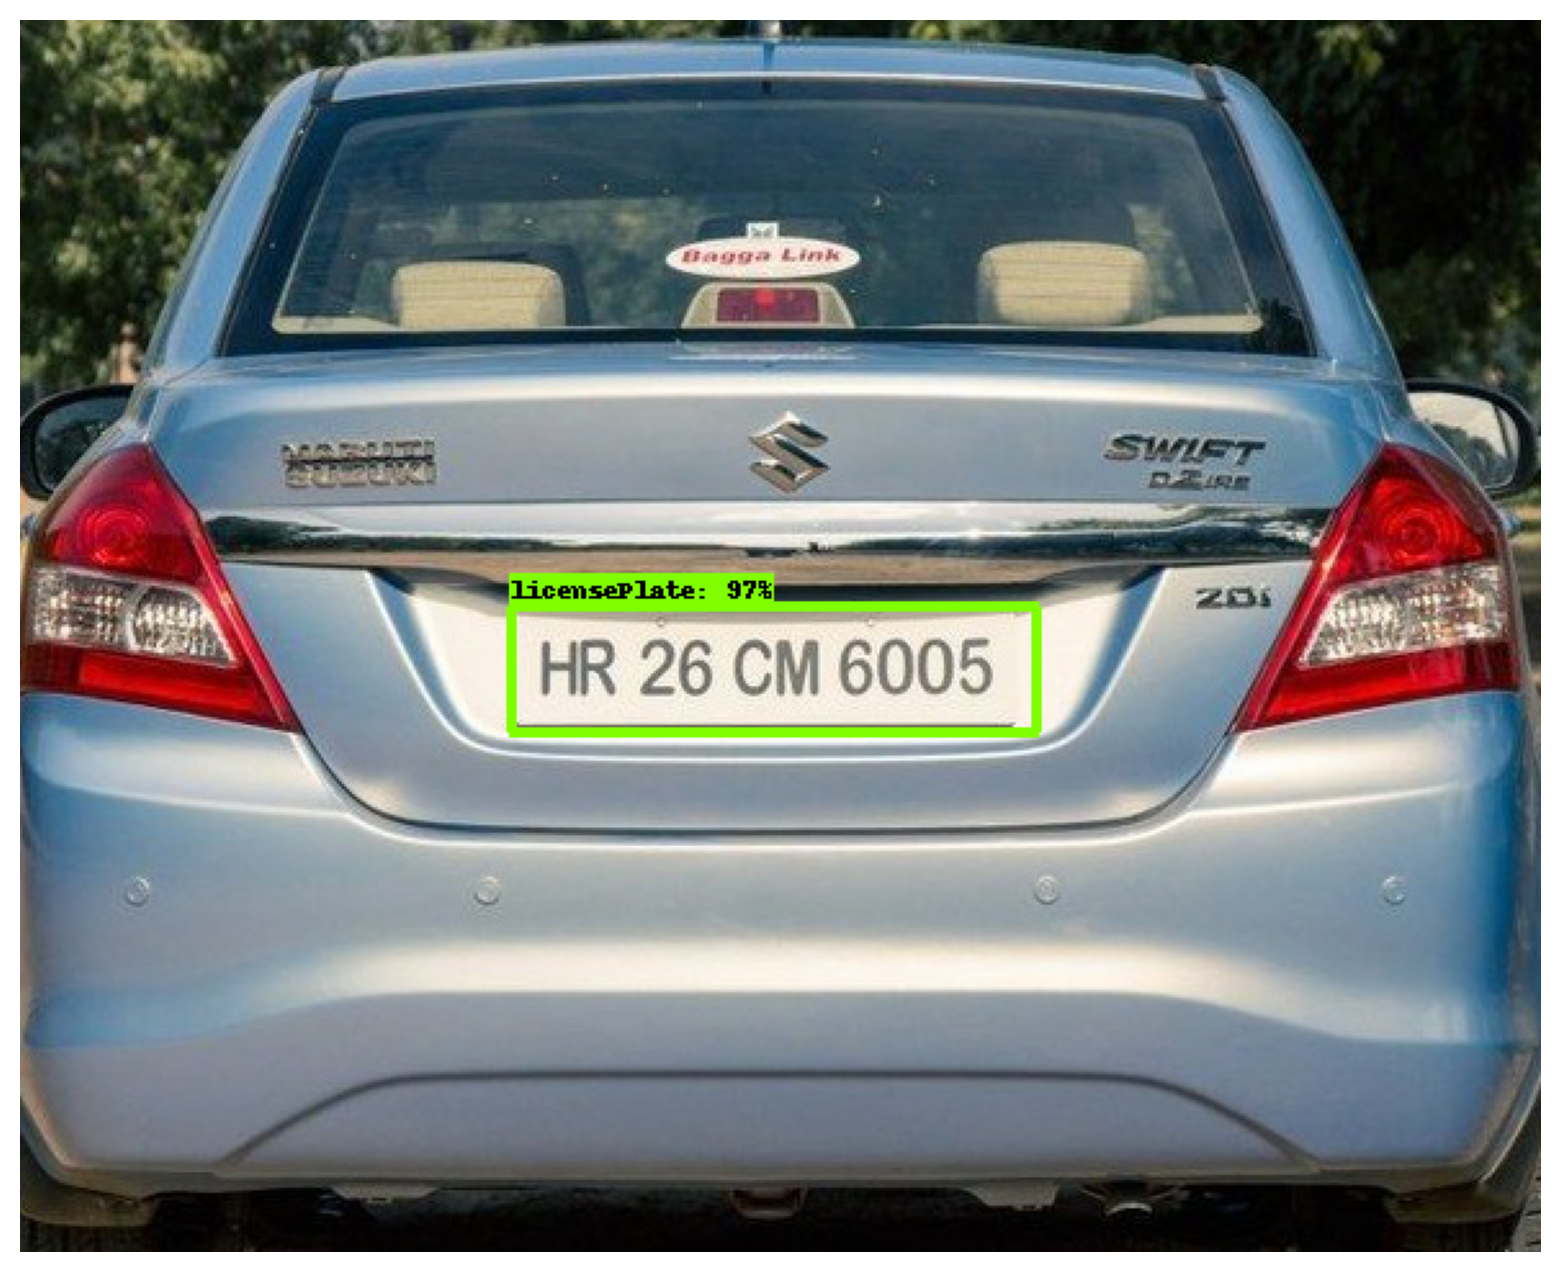

In [73]:
import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
#from google.colab.patches import cv2_imshow
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

IMAGE_SIZE = (12, 8) # Output display size as you want
import matplotlib.pyplot as plt
PATH_TO_SAVED_MODEL="/home/lee/Documents/Indian_License_Plate_Recognition/output/plate_detection/fullModel/saved_model"
print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name=True)
#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

image_path = "/home/lee/Documents/Indian_License_Plate_Recognition/data/plate_detection/test_images/155.jpg"
#print('Running inference for {}... '.format(image_path), end='')

image_np = load_image_into_numpy_array(image_path)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.4, # Adjust this value to set the minimum probability boxes to be classified as True
      agnostic_mode=False)
%matplotlib inline
plt.figure(figsize=IMAGE_SIZE, dpi=200)
plt.axis("off")
plt.imshow(image_np_with_detections)
plt.show()

In [74]:
!python export_tflite_graph_tf2.py \
    --pipeline_config_path={PIPELINE_CONFING_FILEPATH} \
    --trained_checkpoint_dir={CHECKPOINTS_DIR} \
    --output_directory={OUTPUT_DIR}

2023-01-13 15:05:33.786105: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-13 15:05:33.879634: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-13 15:05:34.423555: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-13 15:05:34.423611: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

W0113 15:05:51.357286 139671006713664 save.py:271] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalClassHead_layer_call_fn while saving (showing 5 of 173). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: ../../../output/plate_detection/saved_model/assets
I0113 15:05:54.126013 139671006713664 builder_impl.py:797] Assets written to: ../../../output/plate_detection/saved_model/assets


In [75]:
!saved_model_cli show --dir ../../../output/plate_detection/saved_model --tag_set serve --all

2023-01-13 15:07:33.547163: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-13 15:07:33.644334: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-13 15:07:34.183852: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-13 15:07:34.183896: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [53]:
!tflite_convert \
    --saved_model_dir={PATH_TO_FROZEN_GRAPH} \
    --output_file={TFLITE_MODEL_PATH} \
    --input_shapes=1,300,300,3 \
    --input_arrays=normalized_input_image_tensor \
    --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
    --inference_type=QUANTIZED_UINT8 \
    --mean_values=128 \
    --std_values=128 \
    --change_concat_input_ranges=false \
    --allow_custom_ops

2023-01-13 14:12:58.062679: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-13 14:12:58.160986: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-13 14:12:58.751676: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-13 14:12:58.751718: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [59]:
!tflite_convert --saved_model_dir={PATH_TO_FROZEN_GRAPH} --output_file={TFLITE_MODEL_PATH}

2023-01-13 14:18:56.349093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-13 14:18:56.442413: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-13 14:18:56.979376: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-13 14:18:56.979417: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [12]:
from object_detection.utils import label_map_util

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

print (label_map)
print (categories)
print (category_index)

item {
  name: "licensePlate"
  id: 1
}

[{'id': 1, 'name': 'licensePlate'}]
{1: {'id': 1, 'name': 'licensePlate'}}


In [13]:
NUM_SAMPLES = -1

PATH_TO_TEST_IMAGES_DIR = '../../../data/plate_detection/test_images'

In [14]:
import glob

TEST_IMAGE_PATHS = []
for filename in glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg')):
    TEST_IMAGE_PATHS.append(filename)
    
print ('{} test images:'.format(len(TEST_IMAGE_PATHS)))

if NUM_SAMPLES > 0:
    test_images = np.random.choice(TEST_IMAGE_PATHS, size = NUM_SAMPLES, replace=False)
else:
    test_images = TEST_IMAGE_PATHS

print (test_images)

200 test images:
['../../../data/plate_detection/test_images/148.jpg', '../../../data/plate_detection/test_images/228.jpg', '../../../data/plate_detection/test_images/0850c175-0b8d-47f2-801c-e29f1dbdb367___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_571.jpg', '../../../data/plate_detection/test_images/185.jpg', '../../../data/plate_detection/test_images/868b996f-1f40-47ca-8222-b0f2750d7010___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_nissan-terrano-left-side-view.jpg', '../../../data/plate_detection/test_images/AP27.jpg', '../../../data/plate_detection/test_images/ae0bb069-0e7e-412a-9473-e8e0d4041cbc___135718d1400912281-skoda-rapid-1-6tdi-cr-mt-elegance-ultima-candy-white-white-monster-_mg_3000comp.jpg', '../../../data/plate_detection/test_images/129.jpg', '../../../data/plate_detection/test_images/169.jpg', '../../../data/plate_detection/test_images/AP3.jpg', '../../../data/plate_detection/test_images/AR10.jpg', '../../../data/plate_detection/test_images/11186c4c-5f17-49b1-af37-a138a1e53794___1283

In [16]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)) #.astype(np.uint8)

In [21]:
from object_detection.utils import visualization_utils as vis_util
from PIL import ImageOps

%matplotlib inline 

input_mean = 128
input_std = 128
    
for image_path in test_images:
    image = Image.open(image_path)
    image_np = load_image_into_numpy_array(image.resize((320, 320)))
    input_data = np.array(np.expand_dims(image_np, axis=0), dtype=np.float32)
    input_data = (np.float32(input_data) - input_mean) / input_std

    interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL_PATH)
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    interpreter.allocate_tensors()
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()

    detection_box = np.squeeze(interpreter.tensor(output_details[0]['index'])())
    print("Box: {}".format(detection_box))

    detection_class = np.squeeze(interpreter.tensor(output_details[1]['index'])()).astype(np.uint8)
    print("Class: {}".format(detection_class))

    detection_score = np.squeeze(interpreter.tensor(output_details[2]['index'])())
    print("Score: {}".format(detection_score))

    num_detections = np.squeeze(interpreter.tensor(output_details[3]['index'])()).astype(int)
    print("Detections: {}".format(num_detections))

    #if num_detections > 0 and 
    if detection_score > 0.5: 
        image_np = load_image_into_numpy_array(image)
        ymin = detection_box[0]
        xmin = detection_box[1]
        ymax = detection_box[2]
        xmax = detection_box[3]

        #vis_util.draw_bounding_box_on_image_array(image_np, ymin, xmin, ymax, xmax, color='red', thickness=1)            
        vis_util.visualize_boxes_and_labels_on_image_array(
            image_np,
            np.array([detection_box]),
            np.array([detection_class]),
            np.array([detection_score]),
            category_index,
            #instance_masks=output_dict.get('detection_masks'),
            use_normalized_coordinates=True,
            max_boxes_to_draw=1,
            line_thickness=1,
            min_score_thresh=0.8)

        plt.figure(figsize=(6, 6))
        plt.title(image_path)
        plt.imshow(image_np)
        plt.show()

Box: [0.99330324 0.0524971  0.01699262 0.01505372 0.01193712 0.01155755
 0.01145277 0.01019608 0.00986324 0.00814634]
Class: [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 10.0
Detections: [0 0 0 0 0 0 0 0 0 0]


TypeError: unhashable type: 'numpy.ndarray'